# Tugas-2-Kecerdasan-Artifisial

## Dataset: Pima Indians Diabetes Database (UCI)

### Mengimport Library

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import TensorBoard
import os

### Memuat dan Membagi Data

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, header=None, names=columns)

# Membagi fitur dan label
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Melihat Data Pima Indians Diabetes

In [ ]:
# Melihat beberapa contoh data
print("Contoh Data:")
print(data.head())

# Melihat informasi dataset
print("\nInfo Dataset:")
print(data.info())

# Statistik dataset
print("\nStatistik Dataset:")
print(data.describe())

Contoh Data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   G

### Membangun Model FFNN

In [ ]:
# Model jaringan saraf tiruan dengan `Input` layer
model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

### Kompilasi dan Pelatihan Model

In [ ]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callback TensorBoard
log_dir = "logs/fit"
os.makedirs(log_dir, exist_ok=True)
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[tensorboard_callback])

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6248 - loss: 0.6817 - val_accuracy: 0.6558 - val_loss: 0.6203
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7002 - loss: 0.6041 - val_accuracy: 0.6818 - val_loss: 0.5735
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6900 - loss: 0.5706 - val_accuracy: 0.7013 - val_loss: 0.5484
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6981 - loss: 0.5320 - val_accuracy: 0.6948 - val_loss: 0.5451
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7212 - loss: 0.5268 - val_accuracy: 0.7013 - val_loss: 0.5346
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7737 - loss: 0.4742 - val_accuracy: 0.7143 - val_loss: 0.5297
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7407 - loss: 0.4924 - val_accuracy: 0.7078 - val_loss: 0.5263
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7386 - loss: 0.5015 - val_accuracy: 0.7208 - val_los

### Visualisasi Kurva Training

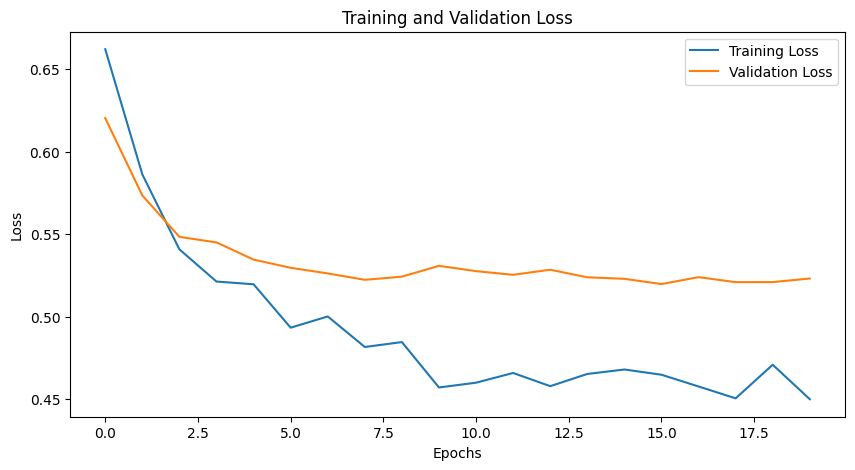

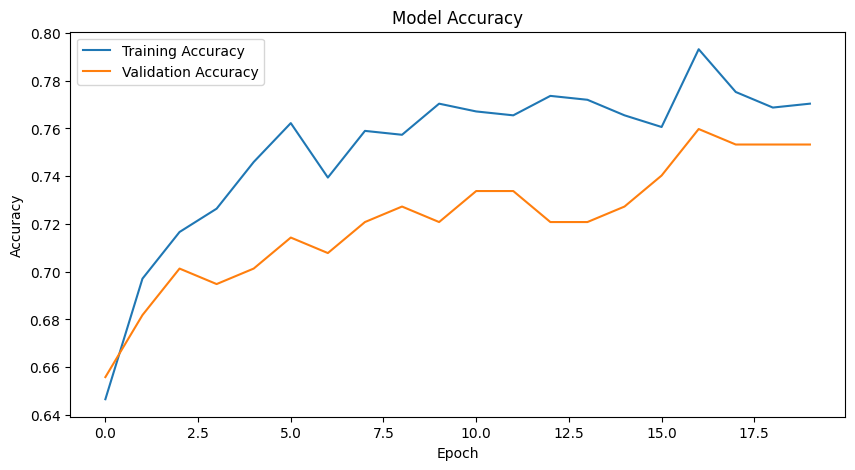

In [ ]:
# Visualisasi kurva training loss dan validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualisasi kurva training accuracy dan validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluasi Model

In [ ]:
# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

5/5 - 0s - 5ms/step - accuracy: 0.7532 - loss: 0.5232
Test Loss: 0.5232
Test Accuracy: 75.32%



### Simpan Model untuk Deployment

In [ ]:
# Menyimpan model
model.save("diabetes_prediction_model.keras")

### Run TensorBoard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=logs/fit

<IPython.core.display.Javascript object>